In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [13]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df = df[df['TotalCharges'] != ' ']

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
df.shape

(7032, 21)

In [21]:
df.drop('customerID', axis = 1, inplace = True)

In [25]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [26]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Churn')

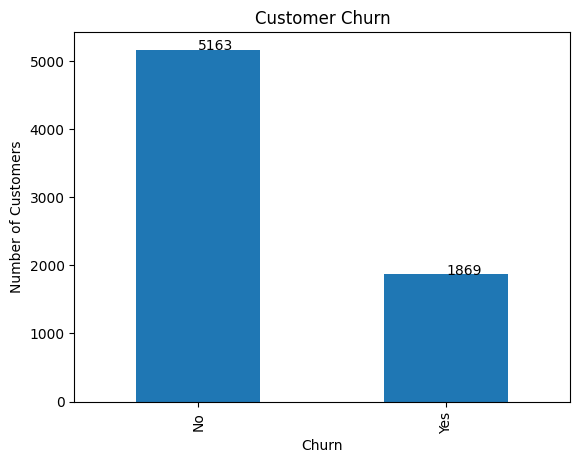

In [30]:
df['Churn'].value_counts().plot(kind = 'bar')
for index, values in enumerate(df['Churn'].value_counts()):
    plt.text(index, values, str(values))
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Customer Churn')

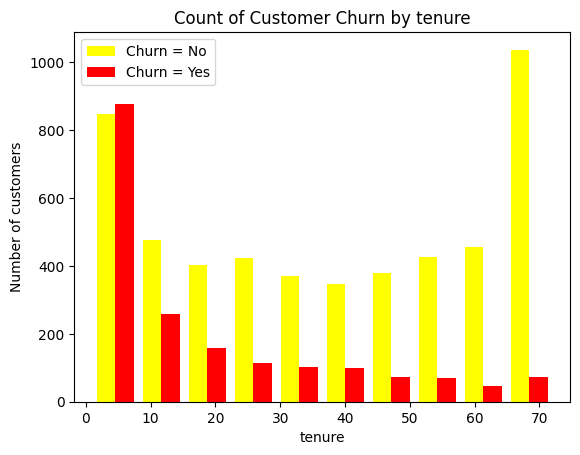

In [38]:
tenure_churn_no = df[df['Churn'] == 'No'].tenure
tenure_churn_yes = df[df['Churn'] == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Count of Customer Churn by tenure')

plt.hist([tenure_churn_no, tenure_churn_yes], color = ['yellow','red'], label = ['Churn = No', 'Churn = Yes'])
plt.legend()

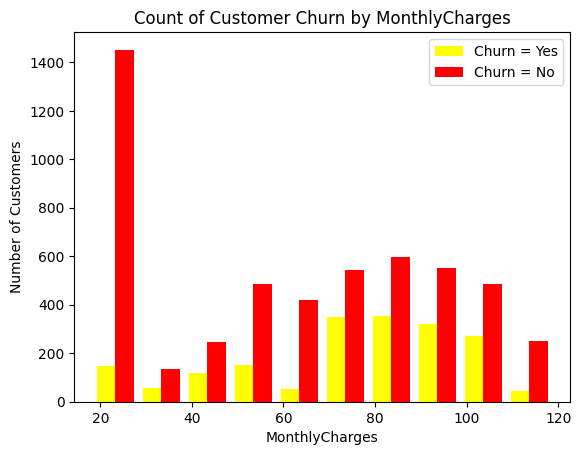

In [42]:
MonthlyCharge_Churn_Yes = df[df['Churn'] == 'Yes'].MonthlyCharges
MonthlyCharge_Churn_No = df[df['Churn'] == 'No'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Count of Customer Churn by MonthlyCharges')

plt.hist([MonthlyCharge_Churn_Yes, MonthlyCharge_Churn_No], color = ['yellow', 'red'], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [44]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
def print_unique_column_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{[col]}: {df[col].unique()}')

In [48]:
print_unique_column_values(df)

['gender']: ['Female' 'Male']
['Partner']: ['Yes' 'No']
['Dependents']: ['No' 'Yes']
['PhoneService']: ['No' 'Yes']
['MultipleLines']: ['No phone service' 'No' 'Yes']
['InternetService']: ['DSL' 'Fiber optic' 'No']
['OnlineSecurity']: ['No' 'Yes' 'No internet service']
['OnlineBackup']: ['Yes' 'No' 'No internet service']
['DeviceProtection']: ['No' 'Yes' 'No internet service']
['TechSupport']: ['No' 'Yes' 'No internet service']
['StreamingTV']: ['No' 'Yes' 'No internet service']
['StreamingMovies']: ['No' 'Yes' 'No internet service']
['Contract']: ['Month-to-month' 'One year' 'Two year']
['PaperlessBilling']: ['Yes' 'No']
['PaymentMethod']: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Churn']: ['No' 'Yes']


In [49]:
df.replace('No phone service', 'No', inplace = True)
df.replace('No internet service', 'No', inplace = True)

In [50]:
print_unique_column_values(df)

['gender']: ['Female' 'Male']
['Partner']: ['Yes' 'No']
['Dependents']: ['No' 'Yes']
['PhoneService']: ['No' 'Yes']
['MultipleLines']: ['No' 'Yes']
['InternetService']: ['DSL' 'Fiber optic' 'No']
['OnlineSecurity']: ['No' 'Yes']
['OnlineBackup']: ['Yes' 'No']
['DeviceProtection']: ['No' 'Yes']
['TechSupport']: ['No' 'Yes']
['StreamingTV']: ['No' 'Yes']
['StreamingMovies']: ['No' 'Yes']
['Contract']: ['Month-to-month' 'One year' 'Two year']
['PaperlessBilling']: ['Yes' 'No']
['PaymentMethod']: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Churn']: ['No' 'Yes']


In [51]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace =True)

In [52]:
for col in df:
    print(f'{[col]}: {df[col].unique()}')

['gender']: ['Female' 'Male']
['SeniorCitizen']: [0 1]
['Partner']: [1 0]
['Dependents']: [0 1]
['tenure']: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['PhoneService']: [0 1]
['MultipleLines']: [0 1]
['InternetService']: ['DSL' 'Fiber optic' 'No']
['OnlineSecurity']: [0 1]
['OnlineBackup']: [1 0]
['DeviceProtection']: [0 1]
['TechSupport']: [0 1]
['StreamingTV']: [0 1]
['StreamingMovies']: [0 1]
['Contract']: ['Month-to-month' 'One year' 'Two year']
['PaperlessBilling']: [1 0]
['PaymentMethod']: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['MonthlyCharges']: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['TotalCharges']: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['Churn']: [0 1]


In [53]:
df['gender'].replace({'Female': 0, 'Male': 1}, inplace = True)

In [54]:
df['gender'].unique()

array([0, 1])

In [55]:
df1 = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'], drop_first = True)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2115,0,0,0,0,71,1,1,1,1,1,...,118.65,8477.60,0,True,False,False,True,False,True,False
1634,1,0,1,1,63,0,0,1,1,1,...,59.00,3707.60,0,False,False,False,True,False,True,False
1405,0,0,0,0,1,1,1,0,0,0,...,76.00,76.00,1,True,False,False,False,False,True,False
2927,1,0,0,0,1,1,0,0,0,0,...,69.90,69.90,0,True,False,False,False,False,True,False
5204,1,1,1,0,38,0,0,0,0,0,...,24.85,955.75,0,False,False,False,False,False,True,False


In [56]:
df1.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year   

In [57]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

In [58]:
for col in df1:
    print(f'{[col]}: {df1[col].unique()}')

['gender']: [0 1]
['SeniorCitizen']: [0 1]
['Partner']: [1 0]
['Dependents']: [0 1]
['tenure']: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
['PhoneService']: [0 1]
['MultipleLines']: [0 1]
['OnlineSecurity']: [0 1]
['OnlineBackup']: [1 0]
['

In [61]:
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5274, 23), (1758, 23), (5274,), (1758,))

In [63]:
df1.shape

(7032, 24)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [66]:
y_pred = model.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [67]:
y_test[:5]

5401    0
1681    0
2076    0
3359    0
6629    0
Name: Churn, dtype: int64

In [68]:
model.score(x_test, y_test)

0.8111490329920364

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1297
           1       0.66      0.58      0.62       461

    accuracy                           0.81      1758
   macro avg       0.76      0.74      0.75      1758
weighted avg       0.80      0.81      0.81      1758



In [76]:
df1.head()
print(df1.shape)

(7032, 24)


In [77]:
#count of classes
count_class_0, count_class_1 = df1.Churn.value_counts()

#divide by classes
df_class_0 = df1[df1.Churn == 0]
df_class_1 = df1[df1.Churn == 1]

In [79]:
count_class_0, count_class_1, df_class_0.shape, df_class_1.shape

(5163, 1869, (5163, 24), (1869, 24))

Under Sampling

In [81]:
#Undersample the 0_class and concat the dataframes of both classes
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

print('Random under-sampling:')
print(df_test_under['Churn'].value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [82]:
x = df_test_under.drop('Churn', axis = 1)
y = df_test_under.Churn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10, stratify = y)

In [85]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    1402
 1    1401
 Name: count, dtype: int64,
 Churn
 1    468
 0    467
 Name: count, dtype: int64)

In [86]:
model.fit(x_train, y_train)

LogisticRegression()

In [87]:
model.score(x_test, y_test)

0.7647058823529411

In [89]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       467
           1       0.76      0.78      0.77       468

    accuracy                           0.76       935
   macro avg       0.77      0.76      0.76       935
weighted avg       0.77      0.76      0.76       935



Over Sampling

In [90]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [91]:
x = df_test_over.drop('Churn', axis = 1)
y = df_test_over.Churn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10, stratify = y)

In [94]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3872
 1    3872
 Name: count, dtype: int64,
 Churn
 0    1291
 1    1291
 Name: count, dtype: int64)

In [95]:
model.fit(x_train, y_train)

LogisticRegression()

In [96]:
model.score(x_test, y_test)

0.7656855151045701

In [97]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1291
           1       0.75      0.81      0.77      1291

    accuracy                           0.77      2582
   macro avg       0.77      0.77      0.77      2582
weighted avg       0.77      0.77      0.77      2582



In [99]:
from platform import python_version
print(python_version())

3.12.9


In [101]:
import sklearn
import tensorflow as tf
import keras
import matplotlib

print(np.__version__)
print(sklearn.__version__)
print(pd.__version__)
print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(sn.__version__)

2.1.3
1.6.1
2.2.3
2.19.0
3.9.2
3.10.1
0.13.2


In [107]:
import scipy
print(scipy.__version__)

1.15.2


In [118]:
import pytest
import imblearn

print(pytest.__version__)
print(imblearn.__version__)

8.3.5
0.13.0


In [138]:
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

In [139]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x, y)

In [140]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.25, random_state = 10, stratify = y_sm)

In [142]:
y_train.value_counts(), y_test.value_counts()

(Churn
 0    3872
 1    3872
 Name: count, dtype: int64,
 Churn
 0    1291
 1    1291
 Name: count, dtype: int64)

In [143]:
model.fit(x_train, y_train)

LogisticRegression()

In [144]:
model.score(x_test, y_test)

0.7811773818745159

In [145]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1291
           1       0.77      0.80      0.78      1291

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582



Use of Ensemble with Undersampling

In [135]:
df1.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [173]:
x = df1.drop('Churn', axis = 1)
y = df1['Churn']

In [174]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10, stratify = y)

In [175]:
y_train.value_counts()

Churn
0    3872
1    1402
Name: count, dtype: int64

In [176]:
df2 = x_train.copy()
df2.Churn = y_train

In [177]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5876,0,1,0,0,0.000000,1,0,0,1,0,...,1,0.674129,0.007754,True,False,False,False,False,True,False
2913,1,0,0,0,0.718310,0,0,1,1,1,...,0,0.454229,0.382662,False,False,False,True,True,False,False
5099,0,0,0,1,0.140845,1,0,0,0,0,...,0,0.018408,0.023373,False,True,False,False,True,False,False
1034,0,0,1,0,0.985915,1,0,1,0,1,...,0,0.632836,0.681468,False,False,False,True,False,False,False
2989,1,0,0,1,0.000000,1,0,0,0,0,...,1,0.009453,0.000046,False,True,False,False,False,False,True


In [178]:
df2_class0 = df2[df2.Churn == 0]
df2_class1 = df2[df2.Churn == 1]
df2_class0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2913,1,0,0,0,0.718310,0,0,1,1,1,...,0,0.454229,0.382662,False,False,False,True,True,False,False
1034,0,0,1,0,0.985915,1,0,1,0,1,...,0,0.632836,0.681468,False,False,False,True,False,False,False
2989,1,0,0,1,0.000000,1,0,0,0,0,...,1,0.009453,0.000046,False,True,False,False,False,False,True
4327,0,0,0,0,0.084507,1,0,0,0,0,...,1,0.513930,0.055216,True,False,False,False,False,False,True
1481,1,0,1,1,1.000000,0,0,1,1,1,...,1,0.466169,0.546446,False,False,False,True,True,False,False


In [179]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)

    return x_train, y_train

In [180]:
x_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1402)

model.fit(x_train, y_train)

LogisticRegression()

In [181]:
model.score(x_test, y_test)

0.7986348122866894

In [182]:
y_pred1 = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [183]:
x_train, y_train = get_train_batch(df2_class0, df2_class1, 1402, 2804)

model.fit(x_train, y_train)

LogisticRegression()

In [184]:
model.score(x_test, y_test)

0.7986348122866894

In [185]:
y_pred2 = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [186]:
x_train, y_train = get_train_batch(df2_class0, df2_class1, 2804, 3872)

model.fit(x_train, y_train)

LogisticRegression()

In [187]:
model.score(x_test, y_test)

0.7986348122866894

In [188]:
y_pred3 = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [189]:
len(y_pred1)

1758

In [190]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [191]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.66      0.50      0.57       467

    accuracy                           0.80      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758

